### Dataset

In [1]:
# fruits.zip

### Import libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D
from keras.preprocessing.image import ImageDataGenerator

### Create image data generator object

In [3]:
train_datagen= ImageDataGenerator(rescale=1/255,
                                 shear_range=0.2,
                                 zoom_range=0.2,
                                 horizontal_flip=True)

In [4]:
test_datagen= ImageDataGenerator(rescale= 1/255)

### Read the images

In [6]:
train= train_datagen.flow_from_directory('fruits_dataset/training_set',
                                        target_size= (64,64),
                                        class_mode= 'binary')

Found 13 images belonging to 2 classes.


In [7]:
train.filenames

['apple\\1.jpg',
 'apple\\2.jpeg',
 'apple\\3.jpeg',
 'apple\\4.jpeg',
 'apple\\5.jpg',
 'apple\\6.jpg',
 'apple\\7.jpg',
 'orange\\1.jpeg',
 'orange\\2.jpg',
 'orange\\3.jpeg',
 'orange\\4.jpeg',
 'orange\\5.jpg',
 'orange\\6.jpg']

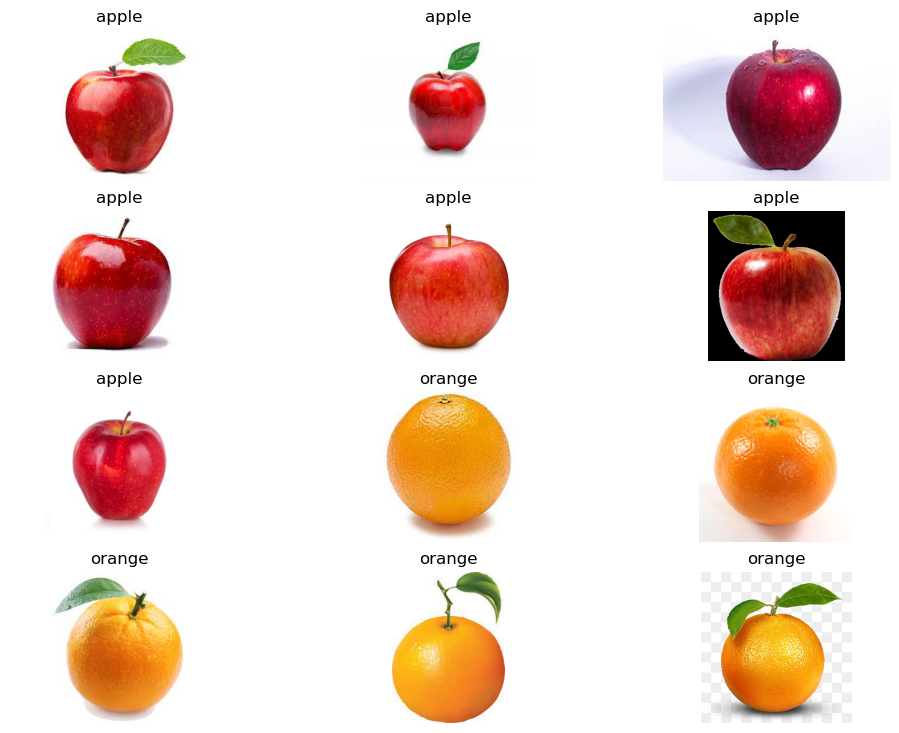

In [12]:
i=1
plt.figure(figsize=(12,9))
for fname in train.filenames:
    if i==13:
        break
    img= plt.imread(train.directory + "/" +fname)
    plt.subplot(4,3,i)
    plt.axis('off')
    i+=1
    plt.title(fname.split('\\')[0])
    plt.imshow(img)

In [13]:
test= test_datagen.flow_from_directory('fruits_dataset/test_set',
                                        target_size= (64,64),
                                        class_mode= 'binary')

Found 6 images belonging to 2 classes.


In [14]:
train.filenames

['apple\\1.jpg',
 'apple\\2.jpeg',
 'apple\\3.jpeg',
 'apple\\4.jpeg',
 'apple\\5.jpg',
 'apple\\6.jpg',
 'apple\\7.jpg',
 'orange\\1.jpeg',
 'orange\\2.jpg',
 'orange\\3.jpeg',
 'orange\\4.jpeg',
 'orange\\5.jpg',
 'orange\\6.jpg']

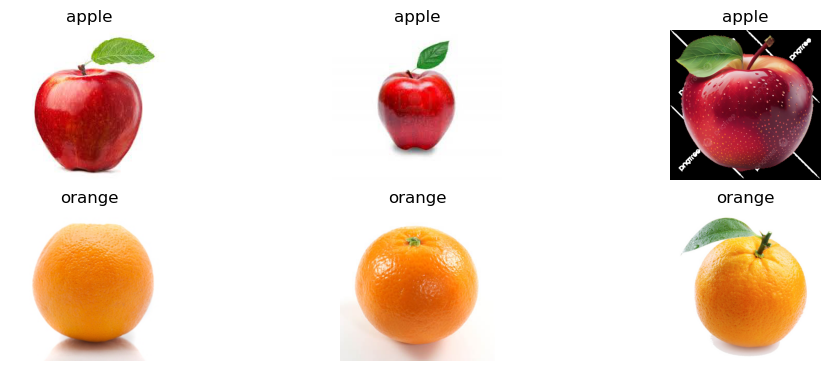

In [17]:
i=1
plt.figure(figsize=(12,9))
for fname in test.filenames:
    if i==7:
        break
    img= plt.imread(test.directory + "/" +fname)
    plt.subplot(4,3,i)
    plt.axis('off')
    i+=1
    plt.title(fname.split('\\')[0])
    plt.imshow(img)

### Build the CNN model

In [18]:
model = Sequential()

model.add(Conv2D(filters=16, kernel_size=(3,3), input_shape=(64,64,3),
                activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))



model.add(Conv2D(filters=8, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 8)         1160      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 8)         0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1568)              0         
                                                                 
 dense (Dense)               (None, 16)                2

### Compile the model

In [20]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [21]:
train.class_indices

{'apple': 0, 'orange': 1}

### Train the model

In [22]:
model.fit(train, epochs=20, validation_data=test)

Epoch 1/20


1/1 [==============================] - 2s 2s/step - loss: 0.7059 - accuracy: 0.5385 - val_loss: 0.6864 - val_accuracy: 0.8333
Epoch 2/20
1/1 [==============================] - 0s 299ms/step - loss: 0.6722 - accuracy: 0.7692 - val_loss: 0.6783 - val_accuracy: 0.6667
Epoch 3/20
1/1 [==============================] - 0s 260ms/step - loss: 0.6688 - accuracy: 0.6923 - val_loss: 0.6736 - val_accuracy: 0.6667
Epoch 4/20
1/1 [==============================] - 0s 285ms/step - loss: 0.6612 - accuracy: 0.7692 - val_loss: 0.6617 - val_accuracy: 0.6667
Epoch 5/20
1/1 [==============================] - 0s 265ms/step - loss: 0.6467 - accuracy: 0.6154 - val_loss: 0.6472 - val_accuracy: 0.8333
Epoch 6/20
1/1 [==============================] - 0s 273ms/step - loss: 0.6181 - accuracy: 0.8462 - val_loss: 0.6274 - val_accuracy: 0.6667
Epoch 7/20
1/1 [==============================] - 0s 297ms/step - loss: 0.6048 - accuracy: 0.7692 - val_loss: 0.6028 - val_accuracy: 1.0000
Epoch 8/20
1/1 [=====

### Predict the class of unseen data

In [52]:
import cv2

img=plt.imread('fruits_dataset/sample1.jpg')

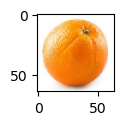

In [53]:
img=cv2.resize(img,(64,64))
plt.figure(figsize=(1,1))
plt.imshow(img)

In [56]:
img=img.reshape(1,64,64,3)
res=round(model.predict(img)[0][0],0)
print(res)

if res==1:
    print('Orange')
elif res==0:
    print('Apple')

1/1 [==============================] - 0s 32ms/step
1.0
Orange


In [49]:
train.class_indices

{'apple': 0, 'orange': 1}